## Big Ideas - Final Project

### Group - Joffin Manjaly and Varun Venkatesh

### Introduction
Our objective was to determine the best neighborhood in Pittsburgh using our own measures of “best” and open datasets taken from WPRDC. We considered many metrics such as convenience and education, but after some thought, we chose the metric of health to determine the best neighborhood to live in. We weighed our health important because to live long, happy, and successful lives, we want to stay healthy. We broke health down into safety, greenery, and populousness as the sub-metrics that we found datasets to support our conclusions. We also considered many different datasets to satisfy these metrics, but ultimately, the datasets that we used to score the neighborhoods based on the metrics mentioned were “Pittsburgh Police Arrest Data” for safety, “City of Pittsburgh Trees” for greenery, and “Pittsburgh SNAP Census Data” for populousness. All datasets were provided by the City of Pittsburgh.

### The Metrics
We chose the metric of safety because we all want to feel safe in our neighborhoods. Neighborhoods with numerous quarrels can be dangerous and injurious to our health both physically and mentally. Even if you aren’t physically harmed in a situation, being part of or even viewing altercation that gets serious can be traumatic and cause health problems in the future. We used the “Pittsburgh Police Arrest Data” to measure safety in the neighborhoods. This dataset gives us the number of arrests and where those arrests were made in the neighborhoods of Pittsburgh. We assume the more arrests in a given neighborhood mean the more altercations in that neighborhood deeming it less safe.

We chose the metric of greenery because it improves upon the health of the environment which also correlates to our own health. Neighborhoods with more plants and green spaces help decrease pollution and better the environment, especially in more urban areas. We used the “City of Pittsburgh Trees” to measure greenery in the neighborhoods. We used this dataset to determine the number of trees in a given neighborhood. The more trees in a neighborhood mean the greener the neighborhood is.

We chose the metric of populousness mainly to react to the recent global pandemic of COVID-19. As we can see based on current statistics, more populous areas, such as NYC, have significantly more infected people. In more populated areas, there are more people interactions, making people more susceptible to diseases and sickness. And obviously, the sicker you are, the less healthy you are. We used the “Pittsburgh SNAP CensusData” to measure populousness in the neighborhoods. This dataset provided us with the population per square mile or the population density in each neighborhood within Pittsburgh. The higher the population density meant the neighborhood was more populous, which ultimately was deemed less healthy based on our findings.

### The Process

Part 1 - Reading in the data files and importing them into DataFrames


In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

So, we are going to import the crime data into a frame, filter the given data(45,000 datapoints) into our very versatile dictionary and back into a dataframe

In [4]:
# importing the Crime Data 
crime_data = pd.read_csv('CrimeData.csv')
neighborhoods = {}
for neigh in crime_data['INCIDENTNEIGHBORHOOD'] :
    if neigh not in neighborhoods:
        neighborhoods[neigh] = 1
    else:
        neighborhoods[neigh] +=1

crime_df = pd.DataFrame(list(neighborhoods.items()), columns=['Neighborhood', 'Number of Crimes'])
crime_df = crime_df.sort_values(by='Number of Crimes')
# fixing the indexes
crime_df.reset_index(inplace = True)
crime_df.drop(columns='index')
crime_df.index += 1
crime_df.reindex()
crime_df =crime_df.drop(columns='index')
crime_df

,Neighborhood,Number of Crimes
1,Mt. Oliver Neighborhood,2
2,Troy Hill-Herrs Island,6
3,Mt. Oliver Boro,14
4,Ridgemont,15
5,Regent Square,21
...,...,...
95,East Allegheny,1400
96,Carrick,1484
97,NaN,1509
98,South Side Flats,2149


Now, we are going to visualize this data! We have the data sorted by ascending crime rates, and we are going to show the top 15 and the bottom 15 neighborhoods

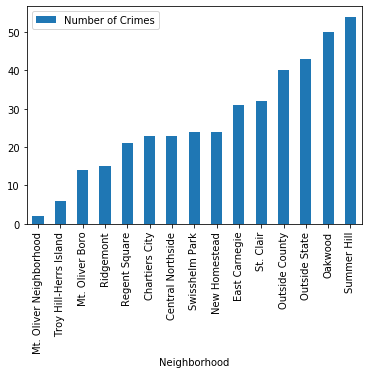

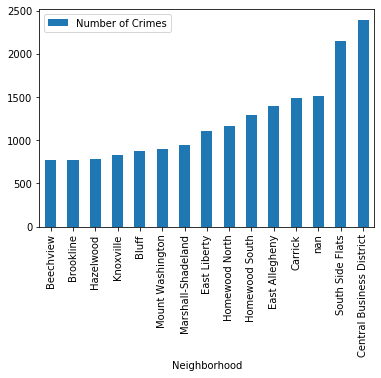

In [36]:
crime_df.head(15).plot(kind='bar', x='Neighborhood', y='Number of Crimes')
crime_df.tail(15).plot(kind='bar', x='Neighborhood', y='Number of Crimes')

We're done with crime data, for now at least. Now we move on to gathering our tree data and putting it in a dataframe after cleaning it up and filtering it.

In [17]:
# reading in tree data
tree = pd.read_csv("trees.csv", sep=",")
neighborhoods = []
numTrees = []
dict = {}
for each in tree['neighborhood'].unique():
    neighborhoods.append(each)
for index, row in tree.iterrows():
    if(row['neighborhood'] not in dict.keys()):
        dict[row['neighborhood']] = 1
    else:
        dict[row['neighborhood']] += 1
for neighbor in dict:
    numTrees.append(dict[neighbor])
dict2 = {}
dict2["neighborhoods"] = neighborhoods
dict2["numberTrees"] = numTrees
trees_df = pd.DataFrame(dict2)
trees_df = trees_df.sort_values(by='numberTrees', ascending=False)
# fixing indexes
trees_df = trees_df.reset_index()
trees_df.index += 1
trees_df = trees_df.drop(columns = ["index"])
trees_df

,neighborhoods,numberTrees
1,Squirrel Hill South,5073
2,Highland Park,2941
3,Squirrel Hill North,2079
4,South Side Flats,1693
5,Shadyside,1558
...,...,...
87,Arlington Heights,5
88,Esplen,3
89,South Shore,2
90,Glen Hazel,2


Now, we are going to visualize this. This data is visualized in descending order, because we love green space. The top 15 and bottom 15 neighborhoods for this metric are shown below.

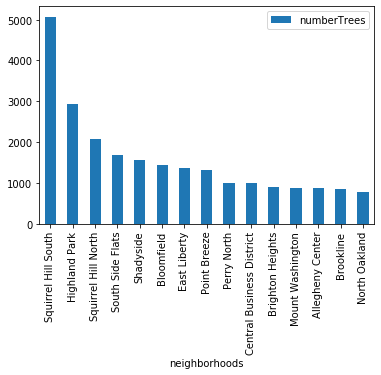

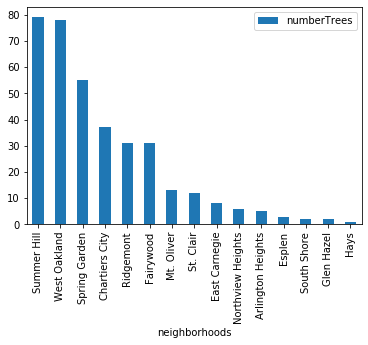

In [38]:
trees_df.head(15).plot(kind = "bar", x = "neighborhoods", y = "numberTrees")
trees_df.tail(15).plot(kind = "bar", x = "neighborhoods", y = "numberTrees")

Now, we move on to our third metric - Populousness! We are organizing this data in ascending order, because we want our ideal neighborhood to act as a safety net to any potential threats of diseases and so on. So, lowest population density to highest.


In [18]:
# Reading in Population data
pop = pd.read_csv("population-density.csv")
neighborhoods = []
popul = []
dict = {}
for each in pop['Neighborhood'].unique():
    neighborhoods.append(each)
for index, row in pop.iterrows():
    dict[row['Neighborhood']] = float(row["Persons / sq. mi (2010)"].replace(",", ""))
for neighbor in dict:
    popul.append(dict[neighbor])
dict2 = {}
dict2["neighborhoods"] = neighborhoods
dict2["popDense"] = popul
pop_df = pd.DataFrame(dict2)
pop_df = pop_df.sort_values(by='popDense', ascending=True)
# Fixing Indexes
pop_df = pop_df.reset_index()
pop_df.index += 1
pop_df = pop_df.drop(columns = ["index"])
pop_df

,neighborhoods,popDense
1,Chateau,28.7
2,South Shore,89.6
3,Hays,206.9
4,St. Clair,674.2
5,North Shore,1000.0
...,...,...
86,Shadyside,15108.6
87,Friendship,16839.6
88,Bluff,20183.5
89,North Oakland,21144.3


Now we visualize the 15 places with the lowest population density and the 15 with the highest.


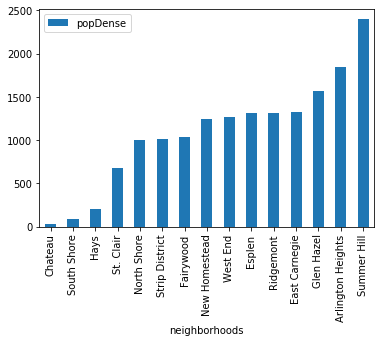

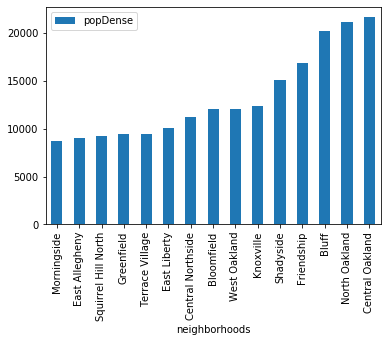

In [37]:
pop_df.head(15).plot(kind = 'bar', x = 'neighborhoods', y = 'popDense')
pop_df.tail(15).plot(kind = "bar", x = "neighborhoods", y = "popDense")

As we can see, North and Central Oakland are the most dense. Ha, we're there most of the time

So, we have collected, filtered, analyzed, and visualized data for our three metrics that we are judging neighborhoods by. We want a low crime rate, a lot of greenery and a safe haven for infectious diseases.


### Putting it all together
So, we are going to use a formula(that we made) that is used by us to implement a ranking or a scoring value to each data point that we have collected. This defines what we prioritized in our data and and outputs a final score for each neighborhood. Each neighborhood gets a base rating of zero, and depending on its performance compared to the others, it can get marked up or down.

In our formula, we gave green space and population density a slightly higher weight than crime rates because the former usually implies the latter.

In [30]:
# going through the three dataframes and assigning them the magic value 
crime_score = []
for crime in crime_df['Number of Crimes']:
    crime_score.append(-1/5 *( crime - crime_df['Number of Crimes'].mean()))
crime_df['Crime Score'] = crime_score
crime_df

,Neighborhood,Number of Crimes,Crime Score
1,Mt. Oliver Neighborhood,2,81.044444
2,Troy Hill-Herrs Island,6,80.244444
3,Mt. Oliver Boro,14,78.644444
4,Ridgemont,15,78.444444
5,Regent Square,21,77.244444
...,...,...,...
95,East Allegheny,1400,-198.555556
96,Carrick,1484,-215.355556
97,NaN,1509,-220.355556
98,South Side Flats,2149,-348.355556


In [31]:
tree_score = []
for tree in trees_df['numberTrees']:
    tree_score.append(1/20 *( tree - trees_df['numberTrees'].mean()))
trees_df['Tree Score'] = tree_score
trees_df

,neighborhoods,numberTrees,Tree Score
1,Squirrel Hill South,5073,228.540659
2,Highland Park,2941,121.940659
3,Squirrel Hill North,2079,78.840659
4,South Side Flats,1693,59.540659
5,Shadyside,1558,52.790659
...,...,...,...
87,Arlington Heights,5,-24.859341
88,Esplen,3,-24.959341
89,South Shore,2,-25.009341
90,Glen Hazel,2,-25.009341


In [32]:
pop_score = []
for pop in pop_df['popDense']:
    pop_score.append(-1/60 *( pop - pop_df['popDense'].mean()))
pop_df['Pop Score'] = pop_score
pop_df

,neighborhoods,popDense,Pop Score
1,Chateau,28.7,96.629352
2,South Shore,89.6,95.614352
3,Hays,206.9,93.659352
4,St. Clair,674.2,85.871019
5,North Shore,1000.0,80.441019
...,...,...,...
86,Shadyside,15108.6,-154.702315
87,Friendship,16839.6,-183.552315
88,Bluff,20183.5,-239.283981
89,North Oakland,21144.3,-255.297315


In [33]:
# putting all of the scores into a dictionary and then into a dataframe
scores_dict={}
for index, row in crime_df.iterrows():
    if row['Neighborhood'] not in scores_dict:
        scores_dict[row['Neighborhood']] = row['Crime Score']
    else:
        scores_dict[row['Neighborhood']] += row['Crime Score']

for index, row in trees_df.iterrows():
    if row['neighborhoods'] not in scores_dict:
        scores_dict[row['neighborhoods']] = row['Tree Score']
    else:
        scores_dict[row['neighborhoods']] += row['Tree Score']

for index, row in pop_df.iterrows():
    if row['neighborhoods'] not in scores_dict:
        scores_dict[row['neighborhoods']] = row['Pop Score']
    else:
        scores_dict[row['neighborhoods']] += row['Pop Score']
# creating the dataframe
Final_df = pd.DataFrame(list(scores_dict.items()), columns=['Neighborhood', 'Total Score'])
Final_df = Final_df.sort_values(by='Total Score', ascending=False)
#Fixing the indexes
Final_df.reset_index(inplace = True)
Final_df.drop(columns='index')
Final_df.index += 1
Final_df.reindex()
Final_df =Final_df.drop(columns='index')
Final_df

,Neighborhood,Total Score
1,Squirrel Hill South,212.407789
2,Highland Park,143.247789
3,Hays,137.044456
4,New Homestead,137.011122
5,St. Clair,136.406122
...,...,...
96,Central Oakland,-256.730544
97,East Allegheny,-257.853878
98,South Side Flats,-309.175544
99,Bluff,-347.048878


Alright, this is our final DataFrame! 
Which means, by our metrics, these neighborhoods are the best!


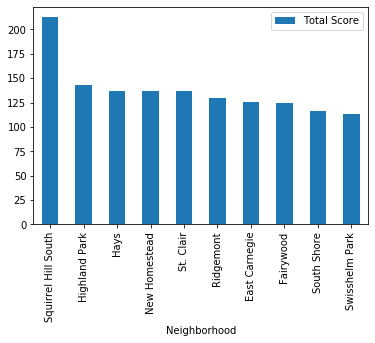

In [34]:
Final_df.head(10).plot(kind='bar', x='Neighborhood', y='Total Score')

### Inferences and Conclusion
So, our data tells us that the neighborhoods with the highest scores did the best with respect to the metrics that we defined. For example, Squirrel Hill South is the most ideal neighborhood, Highland Park coming in second. The Central Business District porformed very poorly afgainst our metrics, proving that it is the least ideal place. For us, at least.

To conclude, this has been a very fun and thought provoking project. We are quite curious how the addition of more data would affect our decison in picking our 'Ideal Neighborhood'.
## For Now, Congrats Squirrel Hill!

